In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018/2018-02-btc-krw.csv")

In [3]:
df.dtypes # identifying column type

timestamp     object
quantity     float64
price          int64
fee          float64
amount         int64
side           int64
dtype: object

In [4]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                 float64
amount                int64
side                  int64
dtype: object

In [5]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)

df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [6]:
## creating 'hour - amount' connection
group_hour_amount = df['amount'].groupby(df['timestamp_hour'])

In [7]:
## 시간별 transaction 수
group_hour_amount.size()

timestamp_hour
0      779
1      791
2      634
3      567
4      509
5      577
6      592
7      772
8      691
9      947
10     740
11     754
12     762
13     830
14     732
15     775
16     885
17     911
18     803
19    1108
20     722
21     728
22     918
23     840
Name: amount, dtype: int64

In [8]:
## 시간별 총 sell - buy
group_hour_amount.sum()

timestamp_hour
0    -44755237
1     13503102
2      6295695
3     21855552
4    -18374759
5    -27397230
6     11977581
7    -43558142
8     39330442
9    -37693043
10    24331679
11    40060202
12     3741885
13   -73877156
14    61419432
15     -947206
16    -7760612
17     7322639
18    35755730
19   -60916494
20     8755548
21   -10804702
22    81837691
23   -10045152
Name: amount, dtype: int64

In [9]:
## creating 'hourly - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_hour_amount_positive = df2['amount'].groupby(df2['timestamp_hour'])

In [10]:
# 시간별 sell transaction 수 (positive)
group_hour_amount_positive.size()

timestamp_hour
0     456
1     439
2     377
3     342
4     286
5     353
6     369
7     439
8     430
9     528
10    480
11    432
12    447
13    470
14    433
15    448
16    501
17    550
18    454
19    662
20    428
21    419
22    529
23    485
Name: amount, dtype: int64

In [11]:
# 시간별 sell 총합
group_hour_amount_positive.sum()

timestamp_hour
0     1632465969
1     1667510563
2     1440544569
3     1231190116
4     1084051894
5     1148767728
6     1155926846
7     1585351799
8     1698249041
9     2063073698
10    1766292970
11    1663976896
12    1706248412
13    1896321352
14    1555138222
15    1823753913
16    1977851923
17    1954599029
18    1812238072
19    2248902303
20    1600914876
21    1482128157
22    1861029416
23    1761388138
Name: amount, dtype: int64

In [12]:
## creating 'hour - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_hour_amount_negative = df3['amount'].groupby(df3['timestamp_hour'])

In [13]:
# 시간별 buy transaction 수
group_hour_amount_negative.size()

timestamp_hour
0     323
1     352
2     257
3     225
4     223
5     224
6     223
7     333
8     261
9     419
10    260
11    322
12    315
13    360
14    299
15    327
16    384
17    361
18    349
19    446
20    294
21    309
22    389
23    355
Name: amount, dtype: int64

In [14]:
# 시간별 buy 총합
group_hour_amount_negative.sum()

timestamp_hour
0    -1677221206
1    -1654007461
2    -1434248874
3    -1209334564
4    -1102426653
5    -1176164958
6    -1143949265
7    -1628909941
8    -1658918599
9    -2100766741
10   -1741961291
11   -1623916694
12   -1702506527
13   -1970198508
14   -1493718790
15   -1824701119
16   -1985612535
17   -1947276390
18   -1776482342
19   -2309818797
20   -1592159328
21   -1492932859
22   -1779191725
23   -1771433290
Name: amount, dtype: int64

In [15]:
# 시간별 절대값 총합
# negative는 buy
absolute_negative_sum = group_hour_amount_negative.sum()
absolute_negative_sum = absolute_negative_sum * (-1)
# total 은 sell - buy
absolute_total_amount = absolute_negative_sum+group_hour_amount_positive.sum()
absolute_total_amount

timestamp_hour
0     3309687175
1     3321518024
2     2874793443
3     2440524680
4     2186478547
5     2324932686
6     2299876111
7     3214261740
8     3357167640
9     4163840439
10    3508254261
11    3287893590
12    3408754939
13    3866519860
14    3048857012
15    3648455032
16    3963464458
17    3901875419
18    3588720414
19    4558721100
20    3193074204
21    2975061016
22    3640221141
23    3532821428
Name: amount, dtype: int64

In [16]:
## 시간별 계산 table 생성
dfs = [group_hour_amount.size(), group_hour_amount.sum(), group_hour_amount_positive.size(), group_hour_amount_positive.sum(), group_hour_amount_negative.size(), group_hour_amount_negative.sum(), absolute_total_amount, absolute_negative_sum]
day_df_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_hour'), dfs)
day_df_final.columns = [ "Hourly transaction", "Hourly sell-buy", "Hourly sell transaction", "Hourly sell", "Hourly buy transaction", "Hourly buy", "Hourly total sell", "Hourly absolute total buy"]
day_df_final

,Hourly transaction,Hourly sell-buy,Hourly sell transaction,Hourly sell,Hourly buy transaction,Hourly buy,Hourly total sell,Hourly absolute total buy
timestamp_hour,,,,,,,,
0,779,-44755237,456,1632465969,323,-1677221206,3309687175,1677221206
1,791,13503102,439,1667510563,352,-1654007461,3321518024,1654007461
2,634,6295695,377,1440544569,257,-1434248874,2874793443,1434248874
3,567,21855552,342,1231190116,225,-1209334564,2440524680,1209334564
4,509,-18374759,286,1084051894,223,-1102426653,2186478547,1102426653
5,577,-27397230,353,1148767728,224,-1176164958,2324932686,1176164958
6,592,11977581,369,1155926846,223,-1143949265,2299876111,1143949265
7,772,-43558142,439,1585351799,333,-1628909941,3214261740,1628909941
8,691,39330442,430,1698249041,261,-1658918599,3357167640,1658918599


In [17]:
day_df_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/hour_result_table_2018_02.csv", header=True, index=True, encoding = 'utf-8')

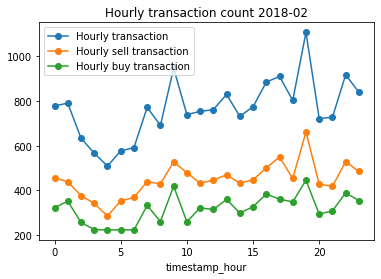

In [18]:
day_df_final[['Hourly transaction', 'Hourly sell transaction', 'Hourly buy transaction']].plot(title='Hourly transaction count 2018-02', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count_2018_02.png', dpi=300)

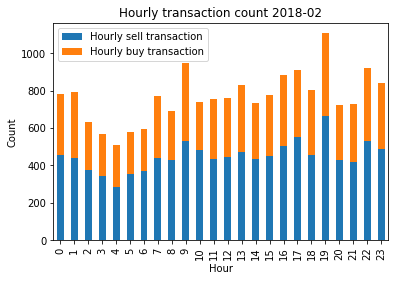

In [19]:
hourTransGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count 2018-02', stacked=True)
hourTransGraph.set_xlabel('Hour')
hourTransGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Stacked)_2018_02.png', dpi=300)

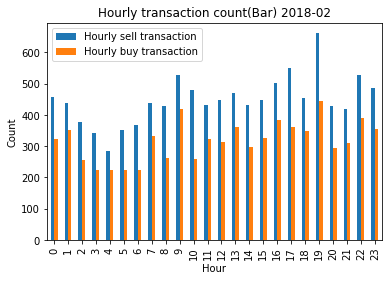

In [20]:
hourTransBarGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count(Bar) 2018-02')
hourTransBarGraph.set_xlabel('Hour')
hourTransBarGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Bar)_2018_02.png', dpi=300)

In [21]:
# Minute
## creating 'minute - amount' connection
group_minute_amount = df['amount'].groupby(df['timestamp_minute'])

In [22]:
# Date
# Creating 'date - amount' connection
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [23]:
# 분 당 transaction 수
group_minute_amount.size()

timestamp_minute
0     312
1     339
2     326
3     298
4     362
5     328
6     311
7     330
8     311
9     306
10    281
11    318
12    327
13    303
14    290
15    329
16    324
17    322
18    289
19    304
20    311
21    325
22    304
23    336
24    283
25    304
26    280
27    267
28    312
29    335
30    328
31    345
32    297
33    301
34    333
35    263
36    356
37    290
38    311
39    280
40    265
41    305
42    278
43    320
44    282
45    339
46    338
47    322
48    301
49    262
50    302
51    295
52    314
53    316
54    287
55    265
56    280
57    280
58    252
59    293
Name: amount, dtype: int64

In [24]:
# date 당 transaction 수
group_date_amount.size()

timestamp_day
14     931
15    1487
16    1208
17     688
18    1047
19     892
20    1523
21    2212
22    2119
23    1373
24     915
25     689
26    1148
27    1058
28    1077
Name: amount, dtype: int64

In [25]:
# minute 별 sell - buy 금액
group_minute_amount.sum()

timestamp_minute
0      22422207
1      35448466
2      41300419
3     -40075911
4     104389380
5     140454391
6     -15879143
7     143851646
8     -77361220
9    -231239736
10    126805326
11    -35735934
12    -25572106
13     84288431
14    264334262
15   -292476681
16     67982968
17     -1797175
18    104264630
19   -210093967
20    -85799634
21   -148546544
22     -9555331
23    177581945
24    -23207651
25     25742690
26    -17381157
27     41312133
28    -58042698
29   -160202632
30    217283679
31    122395019
32   -367653618
33    116088002
34   -150311308
35    114604588
36     97443090
37   -200342988
38    -28359331
39    104692568
40    -11660035
41      8469752
42    240073875
43    -30951590
44     90196131
45    -95451059
46     98665520
47     77539705
48      1769278
49    -88606826
50    163352535
51    -92356912
52     78875351
53   -256026584
54    -33648656
55    -45403490
56    -25538377
57     45420820
58    -98131776
59     20418708
Name: amount, dtype: in

In [26]:
# date 별 sell - buy 금액
group_hour_amount.sum()

timestamp_hour
0    -44755237
1     13503102
2      6295695
3     21855552
4    -18374759
5    -27397230
6     11977581
7    -43558142
8     39330442
9    -37693043
10    24331679
11    40060202
12     3741885
13   -73877156
14    61419432
15     -947206
16    -7760612
17     7322639
18    35755730
19   -60916494
20     8755548
21   -10804702
22    81837691
23   -10045152
Name: amount, dtype: int64

In [27]:
# creating 'minute' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_minute_amount_positive = df2['amount'].groupby(df2['timestamp_minute'])

In [28]:
# creating 'date' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [29]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0     197
1     189
2     184
3     171
4     220
5     206
6     169
7     219
8     178
9     183
10    185
11    174
12    194
13    179
14    178
15    168
16    199
17    179
18    192
19    175
20    170
21    180
22    162
23    184
24    168
25    185
26    171
27    161
28    179
29    169
30    206
31    219
32    140
33    184
34    179
35    162
36    219
37    141
38    175
39    182
40    159
41    173
42    186
43    194
44    166
45    194
46    204
47    197
48    196
49    163
50    197
51    158
52    200
53    165
54    156
55    146
56    157
57    166
58    131
59    174
Name: amount, dtype: int64

In [30]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
14     587
15     867
16     684
17     357
18     560
19     517
20     908
21    1293
22    1235
23     842
24     581
25     426
26     684
27     583
28     633
Name: amount, dtype: int64

In [31]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0     197
1     189
2     184
3     171
4     220
5     206
6     169
7     219
8     178
9     183
10    185
11    174
12    194
13    179
14    178
15    168
16    199
17    179
18    192
19    175
20    170
21    180
22    162
23    184
24    168
25    185
26    171
27    161
28    179
29    169
30    206
31    219
32    140
33    184
34    179
35    162
36    219
37    141
38    175
39    182
40    159
41    173
42    186
43    194
44    166
45    194
46    204
47    197
48    196
49    163
50    197
51    158
52    200
53    165
54    156
55    146
56    157
57    166
58    131
59    174
Name: amount, dtype: int64

In [32]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
14     587
15     867
16     684
17     357
18     560
19     517
20     908
21    1293
22    1235
23     842
24     581
25     426
26     684
27     583
28     633
Name: amount, dtype: int64

In [33]:
# creating 'minute - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_minute_amount_negative = df3['amount'].groupby(df3['timestamp_minute'])

In [34]:
## creating 'date - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [35]:
# minute 별 buy transaction 수
group_minute_amount_negative.size()

timestamp_minute
0     115
1     150
2     142
3     127
4     142
5     122
6     142
7     111
8     133
9     123
10     96
11    144
12    133
13    124
14    112
15    161
16    125
17    143
18     97
19    129
20    141
21    145
22    142
23    152
24    115
25    119
26    109
27    106
28    133
29    166
30    122
31    126
32    157
33    117
34    154
35    101
36    137
37    149
38    136
39     98
40    106
41    132
42     92
43    126
44    116
45    145
46    134
47    125
48    105
49     99
50    105
51    137
52    114
53    151
54    131
55    119
56    123
57    114
58    121
59    119
Name: amount, dtype: int64

In [36]:
# date 별 buy transaction 수
group_date_amount_negative.size()

timestamp_day
14    344
15    620
16    524
17    331
18    487
19    375
20    615
21    919
22    884
23    531
24    334
25    263
26    464
27    475
28    444
Name: amount, dtype: int64

In [37]:
# minute 별 buy 총합
group_minute_amount_negative.sum()

timestamp_minute
0    -704214369
1    -717084324
2    -664460351
3    -615305629
4    -813970863
5    -597132829
6    -719031029
7    -589227845
8    -642947975
9    -803572723
10   -550237547
11   -669810556
12   -648356033
13   -600076000
14   -510864760
15   -842273101
16   -667739337
17   -666785118
18   -524536228
19   -847920820
20   -807655132
21   -788916886
22   -697229493
23   -650644427
24   -715031982
25   -644073300
26   -633793801
27   -605308563
28   -611009324
29   -774012771
30   -684471282
31   -700445973
32   -878085224
33   -573927721
34   -786371501
35   -519300131
36   -678607314
37   -731682703
38   -774644723
39   -525998419
40   -643166715
41   -671144291
42   -482633701
43   -718105574
44   -612981509
45   -696018337
46   -583042938
47   -611097488
48   -684687008
49   -702623441
50   -591128100
51   -623788703
52   -592064418
53   -794052681
54   -628676127
55   -680233147
56   -597949162
57   -555853706
58   -608009044
59   -543844260
Name: amount, dtype: in

In [38]:
# daye 별 buy 총합
group_date_amount_negative.sum()

timestamp_day
14   -1545473289
15   -2528519619
16   -2211151291
17   -1373126280
18   -2177595636
19   -1746038480
20   -3005533803
21   -5373995520
22   -4985752170
23   -3167029130
24   -1964561800
25   -1612421087
26   -2747336401
27   -2873635566
28   -2485688385
Name: amount, dtype: int64

In [39]:
# minute 별 절대값 총합
# negative는 buy
absolute_minute_negative_sum = group_minute_amount_negative.sum()
absolute_minute_negative_sum = absolute_minute_negative_sum * (-1)
# total 은 sell - buy
absolute_minute_total_amount = absolute_minute_negative_sum+group_minute_amount_positive.sum()
absolute_minute_total_amount

timestamp_minute
0     1430850945
1     1469617114
2     1370221121
3     1190535347
4     1732331106
5     1334720049
6     1422182915
7     1322307336
8     1208534730
9     1375905710
10    1227280420
11    1303885178
12    1271139960
13    1284440431
14    1286063782
15    1392069521
16    1403461642
17    1331773061
18    1153337086
19    1485747673
20    1529510630
21    1429287228
22    1384903655
23    1478870799
24    1406856313
25    1313889290
26    1250206445
27    1251929259
28    1163975950
29    1387822910
30    1586226243
31    1523286965
32    1388516830
33    1263943444
34    1422431694
35    1153204850
36    1454657718
37    1263022418
38    1520930115
39    1156689406
40    1274673395
41    1350758334
42    1205341277
43    1405259558
44    1316159149
45    1296585615
46    1264751396
47    1299734681
48    1371143294
49    1316640056
50    1345608735
51    1155220494
52    1263004187
53    1332078778
54    1223703598
55    1315062804
56    1170359947
57    11571282

In [40]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total 은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount

timestamp_day
14     3076960498
15     5057773330
16     4439990225
17     2747684700
18     4343122597
19     3506012859
20     6013066426
21    10747716344
22     9964204183
23     6345763652
24     3930137340
25     3225412432
26     5484101948
27     5740524649
28     4993303176
Name: amount, dtype: int64

In [41]:
# minute 별 계산 table 생성
dfs = [group_minute_amount.size(), group_minute_amount.sum(), group_minute_amount_positive.size(), group_minute_amount_positive.sum(), group_minute_amount_negative.size(), group_minute_amount_negative.sum(), absolute_minute_total_amount, absolute_minute_negative_sum]
day_df_minute_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_minute'), dfs)
day_df_minute_final.columns = [ "Minute transaction", "Minute sell-buy", "Minute sell transaction", "Minute sell", "Minute buy transaction", "Minute buy", "Minute total sell", "Minute absolute total buy"]
day_df_minute_final

,Minute transaction,Minute sell-buy,Minute sell transaction,Minute sell,Minute buy transaction,Minute buy,Minute total sell,Minute absolute total buy
timestamp_minute,,,,,,,,
0,312,22422207,197,726636576,115,-704214369,1430850945,704214369
1,339,35448466,189,752532790,150,-717084324,1469617114,717084324
2,326,41300419,184,705760770,142,-664460351,1370221121,664460351
3,298,-40075911,171,575229718,127,-615305629,1190535347,615305629
4,362,104389380,220,918360243,142,-813970863,1732331106,813970863
5,328,140454391,206,737587220,122,-597132829,1334720049,597132829
6,311,-15879143,169,703151886,142,-719031029,1422182915,719031029
7,330,143851646,219,733079491,111,-589227845,1322307336,589227845
8,311,-77361220,178,565586755,133,-642947975,1208534730,642947975


In [42]:
# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_total_amount, absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date total sell", "Date absolute total buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date total sell,Date absolute total buy
timestamp_day,,,,,,,,
14,931,-13986080,587,1531487209,344,-1545473289,3076960498,1545473289
15,1487,734092,867,2529253711,620,-2528519619,5057773330,2528519619
16,1208,17687643,684,2228838934,524,-2211151291,4439990225,2211151291
17,688,1432140,357,1374558420,331,-1373126280,2747684700,1373126280
18,1047,-12068675,560,2165526961,487,-2177595636,4343122597,2177595636
19,892,13935899,517,1759974379,375,-1746038480,3506012859,1746038480
20,1523,1998820,908,3007532623,615,-3005533803,6013066426,3005533803
21,2212,-274696,1293,5373720824,919,-5373995520,10747716344,5373995520
22,2119,-7300157,1235,4978452013,884,-4985752170,9964204183,4985752170


In [43]:
# table 저장하기
day_df_minute_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/minute_result_table_2018_02.csv", header=True, index=True, encoding = 'utf-8')

In [44]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table_2018_02.csv", header=True, index=True, encoding = 'utf-8')

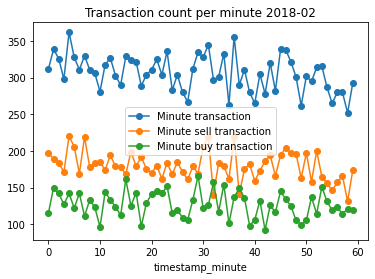

In [45]:
# Minute - transaction 그래프 그리기
day_df_minute_final[['Minute transaction', 'Minute sell transaction', 'Minute buy transaction']].plot(title='Transaction count per minute 2018-02', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute_2018_02.png', dpi=300)

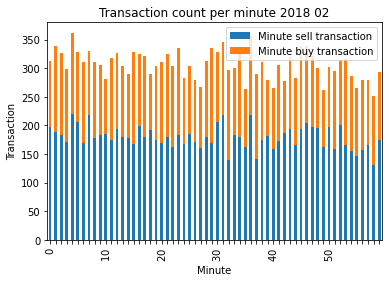

In [46]:
minuteTransGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute 2018 02', stacked=True)
minuteTransGraph.set_xlabel('Minute')
minuteTransGraph.set_ylabel('Transaction')
minuteTransGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Stacked)_2018_02.png', dpi=300)

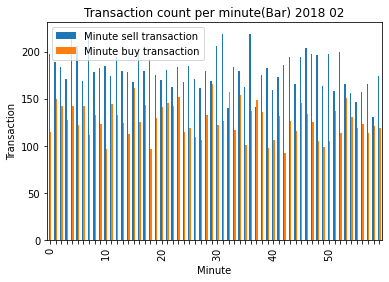

In [47]:
minuteTransBarGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute(Bar) 2018 02')
minuteTransBarGraph.set_xlabel('Minute')
minuteTransBarGraph.set_ylabel('Transaction')
minuteTransBarGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Bar)_2018_02.png', dpi=300)

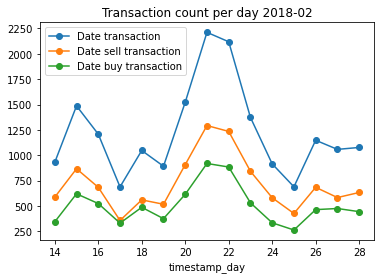

In [48]:
# Date - transaction 그래프 그리기
day_df_date_final[['Date transaction', 'Date sell transaction', 'Date buy transaction']].plot(title='Transaction count per day 2018-02', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day_2018_02.png', dpi=300)

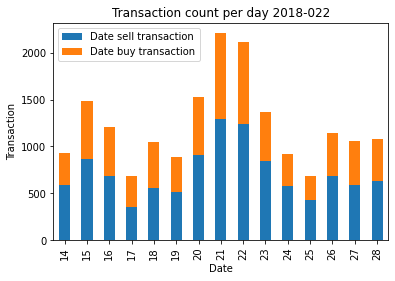

In [49]:
dayTransGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day 2018-022', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Stacked)_2018_02.png', dpi=300)

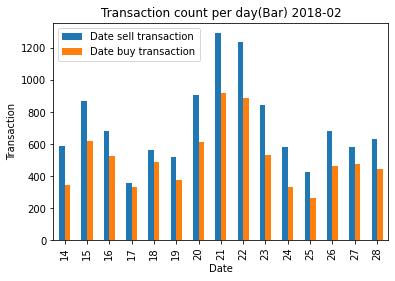

In [50]:
dayTransBarGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day(Bar) 2018-02')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Bar)_2018_02.png', dpi=300)